# Coronavirus articles

En esta notebook mostraremos algunos 

In [1]:
%load_ext autoreload
%autoreload 2
from mongoengine import connect
from tweepyrate import create_apps
from hatespeech_models import Tweet, Article

client = connect("hatespeech-news")

db = client["hatespeech-news"]

print(f"Tenemos {Article.objects.count()} art√≠culos")

Tenemos 86606 art√≠culos


Busquemos art√≠culos con:

* 10 comentarios al menos
* Con al menos un comentario marcado como odioso
* Que hable de Coronavirus

In [2]:
Article.objects.distinct('user')

['LANACION',
 'LaVanguardia',
 'abc_es',
 'clarincom',
 'cronica',
 'elmundoes',
 'elpaisuy',
 'infobae',
 'izquierdadiario',
 'laderechadiario',
 'latercera',
 'pagina12',
 'perfilcom']

In [3]:
initial_query = {
    "user__in": ["LANACION", "clarincom", "cronica", "infobae", "perfilcom"]
    #comments__10__exists": True,
    #"comments__hateful_value__gt": 0.5
}

covid_terminos = [
    "coronavirus", "covid-19", "cuarentena", 
    "normalidad", "aislamiento", "padecimiento", "encierro", 
    "fase", "infectados", "Wuhan", "distanciamiento", "salud", "fiebre", "s√≠ntomas",
    # Palabras que sacamos porque no suman nada
    # "covid", "virus","ASPO"
]

dengue_terminos = [
    "dengue", "aedes", "mosquito", "descacharrar",
    "cacharro",
]

terminos = covid_terminos + dengue_terminos

print(f"Cantidad de art√≠culos sin filtro por palabras: {Article.objects(**initial_query).count()}")


articles = Article.objects(**initial_query).search_text('Coronavirus')
print(articles.count())

Cantidad de art√≠culos sin filtro por palabras: 48439
31294


In [7]:
Y = [Article.objects(**initial_query).search_text(" ".join(covid_terminos[:i])).count() 
     for i in range(1, len(covid_terminos)+1)]

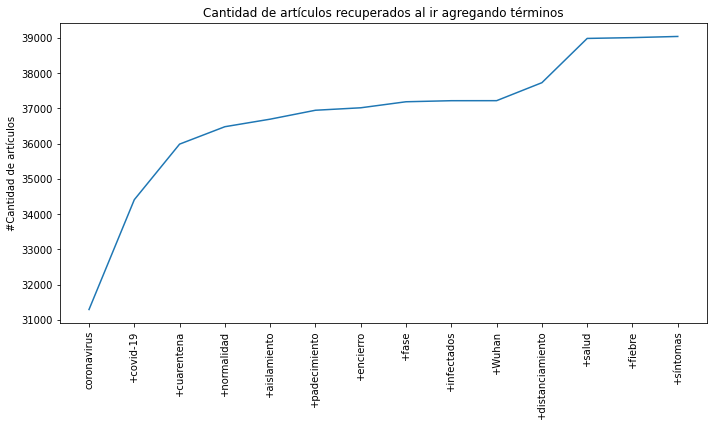

In [8]:
import matplotlib.pyplot as plt

ticks = covid_terminos.copy()
for i in range(1, len(ticks)):
    ticks[i] = f"+{ticks[i]}"

plt.figure(figsize=(10, 6))

X = list(range(len(ticks)))
plt.plot(X, Y)

plt.ylabel("#Cantidad de art√≠culos")
plt.xticks(X, ticks, rotation=90);

plt.title("Cantidad de art√≠culos recuperados al ir agregando t√©rminos")

plt.tight_layout(pad=1.0)
plt.savefig("articulos-termino-covid.png")


In [15]:
import numpy as np

print("T√©rminos que no suman nada")
for i in np.argwhere(np.abs(np.array(Y[:-1]) - np.array(Y[1:])) > 500):
    print(covid_terminos[i.item()+1])

T√©rminos que no suman nada
covid-19
cuarentena
distanciamiento
salud


Hay s√≥lo dos palabras raras:

- Cuarentena
- salud

## Cuarentena

In [17]:
Article.objects(**initial_query).search_text("cuarentena -covid-19 -coronavirus").count()

1577

In [19]:
for article in Article.objects(**initial_query).search_text("cuarentena -covid-19 -coronavirus").limit(100):
    print("--")
    print(article.created_at)
    print(article.url)
    print(f"{article.user} -- {article.title}")
    print(f"{len(article.comments)} comentarios")

--
2020-05-07 22:00:22
https://www.perfil.com/noticias/economia/bajan-leliq-encajes-bancos-financien-pymes-sin-acceso-creditos.phtml
perfilcom -- El Central ampl√≠a medidas para financiar a las pyme sin acceso al cr√©dito
1 comentarios
--
2020-04-29 00:53:01
https://www.cronica.com.ar/policiales/Violo-cuarentena-con-sorpresas-en-el-auto-llevaba-cocaina-y-a-su-hija-en-el-baul-20200428-0047.html
cronica -- Viol√≥ cuarentena con "sorpresas" en el auto: llevaba coca√≠na y a su hija en el ba√∫l
3 comentarios
--
2020-05-07 14:24:53
https://bit.ly/2WxYCrS
cronica -- Georgina Barbarossa, solidaria durante la cuarentena
2 comentarios
--
2020-04-29 11:00:00
https://www.perfil.com/noticias/opinion/opinion-martin-balza-el-combate-en-el-monte-longdon-un-encarnizado-cuerpo-a-cuerpo.phtml
perfilcom -- El combate en el monte Longdon, un encarnizado cuerpo a cuerpo
1 comentarios
--
2020-05-13 16:05:17
https://www.diarioshow.com/por-la-red/More-Rial-embarazada-20200512-0031.html
cronica -- More Rial, ¬ø

## Salud

In [21]:
Article.objects(**initial_query).search_text("salud -cuarentena -covid-19 -coronavirus").count()

1621

In [22]:
for article in Article.objects(**initial_query).search_text("salud -cuarentena -covid-19 -coronavirus").limit(100):
    print("--")
    print(article.created_at)
    print(article.url)
    print(f"{article.user} -- {article.title}")
    print(f"{len(article.comments)} comentarios")

--
2020-05-23 15:20:00
https://www.perfil.com/noticias/opinion/ramon-carrillo-no-era-nazi-pero-uno-de-sus-asesores-si.phtml
perfilcom -- Ram√≥n Carrillo no era nazi, pero uno de sus asesores s√≠
15 comentarios
--
2020-02-10 16:28:20
https://www.cronica.com.ar/politica/Alberto-Me-molesta-que-digan-que-tengo-presos-politicos-porque-no-los-tengo-20200210-0047.html
cronica -- Alberto: "Me molesta que digan que tengo presos pol√≠ticos porque no los tengo"
9 comentarios
--
2020-03-28 04:05:00
https://www.diarioshow.com/farandula/Mataron-a-Hilda-Bernard-en-las-redes-y-su-familia-lo-desmintio-20200327-0006.html
cronica -- "Mataron" a Hilda Bernard en las redes y su familia lo desminti√≥
4 comentarios
--
2020-05-04 17:53:34
http://dlvr.it/RW0Ld9
LANACION -- Entre risas y con la marcha peronista de fondo, Andr√©s "Cuervo" Larroque jur√≥ como ministro de Axel Kicillof
70 comentarios
--
2020-05-31 19:53:02
http://dlvr.it/RXk3Kz
LANACION -- NASA y SpaceX: as√≠ fue el encuentro de los astronautas co

## Dengue

In [26]:
nuevos_terminos = ["dengue", "aedes", "mosquito", "cacharro", "descacharrar"]

In [27]:
Y = [Article.objects(**initial_query).search_text(" ".join(nuevos_terminos[:i])).count() 
     for i in range(1, len(nuevos_terminos)+1)]

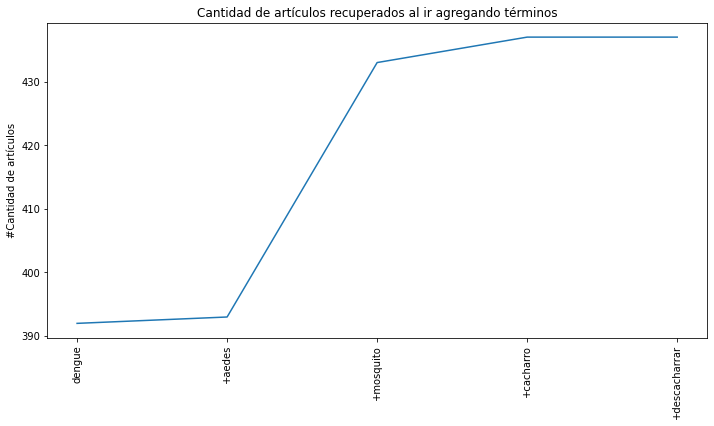

In [28]:
import matplotlib.pyplot as plt

ticks = nuevos_terminos.copy()
for i in range(1, len(ticks)):
    ticks[i] = f"+{ticks[i]}"

plt.figure(figsize=(10, 6))

X = list(range(len(ticks)))
plt.plot(X, Y)

plt.ylabel("#Cantidad de art√≠culos")
plt.xticks(X, ticks, rotation=90);

plt.title("Cantidad de art√≠culos recuperados al ir agregando t√©rminos")

plt.tight_layout(pad=1.0)
plt.savefig("articulos-termino-dengue.png")


In [29]:
articles = Article.objects(**initial_query).search_text("mosquito -dengue -coronavirus -cuarentena -covid-19")

print(articles.count())

for art in articles:
    print("="*80+'\n\n')
    print(art.created_at)
    print(art.url)
    
    print(art.body)
    print(art)

6


2020-03-19 21:24:55
https://www.clarin.com/fama/jorge-lanata-destrozo-mario-massaccesi-puta-vida-dio-noticia-_0_vC0FO7wkn.html?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1584653095
Que sirva de reconocimiento: los reportajes de Ulises Jaitt tienen "ese no s√© qu√©". El show del espect√°culo, el ciclo radial que tiene el hermano de Natacha en AM 1300 La Salada es un generador constante de esc√°ndalos y pol√©micas. Esta semana, fue el turno de Mario Massaccesi, quien habl√≥ de Jorge Lanata. Y ahora, lleg√≥ la respuesta.

En un tramo de la entrevista con Jaitt, el periodista de las noches del Trece hizo referencia a Lanata, y su comentario no le cay√≥ nada bien al conductor de PPT. Ante la pregunta de si trabajar√≠a con Jorge o con V√≠ctor Hugo Morales, Massaccesi respondi√≥: "No, estoy muy bien donde estoy y puedo elegir. No se me cruza trabajar con Lanata, Majul, V√≠ctor Hugo‚Ä¶ Con mucha gente que est√° en el candelero. Adem√°s, porque yo personalmente me he cor

## Salvamos

In [6]:
terminos = covid_terminos + dengue_terminos
terminos.remove("salud")

text_search = " ".join(terminos)
text_search, initial_query

('coronavirus covid-19 cuarentena normalidad aislamiento padecimiento encierro fase infectados Wuhan distanciamiento fiebre s√≠ntomas dengue aedes mosquito descacharrar cacharro',
 {'user__in': ['LANACION', 'clarincom', 'cronica', 'infobae', 'perfilcom']})

In [35]:

articles = Article.objects(**initial_query).search_text(text_search)

articles.count()

37859